In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Show all columns
pd.set_option('display.max_columns', None)

## Teams

- yearID         Year
- lgID           League
- teamID         Team
- franchID       Franchise (links to TeamsFranchise table)
- divID          Team's division
- Rank           Position in final standings
- G              Games played
- GHome          Games played at home
- W              Wins
- L              Losses
- DivWin         Division Winner (Y or N)
- WCWin          Wild Card Winner (Y or N)
- LgWin          League Champion(Y or N)
- WSWin          World Series Winner (Y or N)
- R              Runs scored
- AB             At bats
- H              Hits by batters
- 2B             Doubles
- 3B             Triples
- HR             Homeruns by batters
- BB             Walks by batters
- SO             Strikeouts by batters
- SB             Stolen bases
- CS             Caught stealing
- HBP            Batters hit by pitch
- SF             Sacrifice flies
- RA             Opponents runs scored
- ER             Earned runs allowed
- ERA            Earned run average
- CG             Complete games
- SHO            Shutouts
- SV             Saves
- IPOuts         Outs Pitched (innings pitched x 3)
- HA             Hits allowed
- HRA            Homeruns allowed
- BBA            Walks allowed
- SOA            Strikeouts by pitchers
- E              Errors
- DP             Double Plays
- FP             Fielding  percentage
- name           Team's full name
- park           Name of team's home ballpark
- attendance     Home attendance total
- BPF            Three-year park factor for batters
- PPF            Three-year park factor for pitchers
- teamIDBR       Team ID used by Baseball Reference website
- teamIDlahman45 Team ID used in Lahman database version 4.5
- teamIDretro    Team ID used by Retrosheet

In [15]:
# Read in the data
teams = pd.read_csv('data/Teams.csv')

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [13]:
# Filter lgID to only NL
#teams = teams[teams['lgID'] == 'NL']
# Keep only the columns we need


In [14]:
teams.head()

,yearID,lgID,teamID,Rank
0,1871,NaN,BS1,3
1,1871,NaN,CH1,2
2,1871,NaN,CL1,8
3,1871,NaN,FW1,7
4,1871,NaN,NY2,5


In [29]:
# Import data for war
player = pd.read_csv('data/war_baseballreference.csv')
# Rename the player_id to playerID, year_ID to yearID, and team_id to teamID
player = player.rename(columns={'player_ID': 'playerID', "year_ID":"yearID",'team_ID': 'teamID'})

In [30]:
player.head()



,name,age,playerID,yearID,teamID,WAR_bat,WAR_pit,WAR_total
0,David Aardsma,22.0,aardsda01,2004,SFG,0.00,-0.15,-0.15
1,David Aardsma,24.0,aardsda01,2006,CHC,-0.04,0.61,0.57
2,David Aardsma,25.0,aardsda01,2007,CHW,0.00,-0.40,-0.40
3,David Aardsma,26.0,aardsda01,2008,BOS,-0.02,-0.31,-0.33
4,David Aardsma,27.0,aardsda01,2009,SEA,0.00,1.69,1.69


In [41]:
def create_team_war(teams, player, cols):
    """
    Creates a new dataframe with the an aggregated WAR score for each team for each year

    Parameters
    ----------
    teams : DataFrame
        DataFrame containing the team information per year
    player : DataFrame
        DataFrame containing the player information such as WAR, salary, height etc.
    cols : list
        List of columns to aggregate in the player dataframe

    Returns
    -------
    DataFrame
        DataFrame containing the aggregated WAR score for each team for each year
    """
    # Team columns to keep
    team_cols = ["yearID","lgID","teamID", "Rank"]
    teams = teams[team_cols]

    # Group by team and year and aggregate the cols by mean
    team_war = player.groupby(["yearID", "teamID"])[cols].mean().reset_index()

    # Merge the teams with the team_war
    team_war = pd.merge(teams, team_war, on=["yearID", "teamID"], how="left")

    return team_war


cols = ["WAR_bat", "WAR_pit","WAR_total"]
team_war = create_team_war(teams, player, cols)
team_war.head()

,yearID,lgID,teamID,Rank,WAR_bat,WAR_pit,WAR_total
0,1871,NaN,BS1,3,NaN,NaN,NaN
1,1871,NaN,CH1,2,NaN,NaN,NaN
2,1871,NaN,CL1,8,NaN,NaN,NaN
3,1871,NaN,FW1,7,NaN,NaN,NaN
4,1871,NaN,NY2,5,NaN,NaN,NaN


In [43]:
team_war.value_counts("yearID")

yearID
1884    33
2021    30
1998    30
1999    30
2000    30
2001    30
2002    30
2003    30
2004    30
2005    30
2007    30
2008    30
2009    30
2006    30
2010    30
2015    30
2020    30
2019    30
2018    30
2011    30
2016    30
2017    30
2014    30
2013    30
2012    30
1997    28
1996    28
1995    28
1994    28
1993    28
1982    26
1983    26
1980    26
1981    26
1977    26
1979    26
1978    26
1985    26
1984    26
1986    26
1988    26
1987    26
1989    26
1990    26
1991    26
1992    26
1890    25
1974    24
1969    24
1970    24
1971    24
1973    24
1972    24
1975    24
1976    24
1915    24
1914    24
1963    20
1965    20
1962    20
1964    20
1968    20
1966    20
1967    20
1961    18
1891    17
1955    16
1951    16
1952    16
1953    16
1954    16
1949    16
1956    16
1957    16
1958    16
1959    16
1960    16
1950    16
1946    16
1948    16
1921    16
1919    16
1918    16
1917    16
1916    16
1913    16
1912    16
1911    16
1947    16
1909    16
190

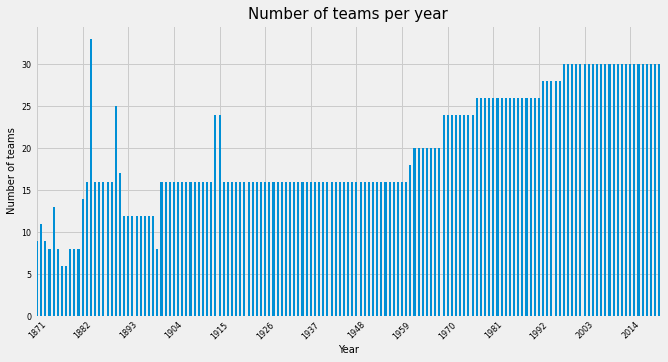

In [57]:
### Plot the number of teams per year ###
# Set plot size
plt.figure(figsize=(10,5))
# Plot value_counts(yearID) as a bar plot and sort by yearID
team_war.value_counts("yearID").sort_index().plot(kind="bar")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks
plt.locator_params(axis='x', nbins=15)
# Add a title
plt.title("Number of teams per year", fontsize=15)
# Add y-label
plt.ylabel("Number of teams", fontsize=10)
# Add x-label
plt.xlabel("Year", fontsize=10)
# x-axis ticks fontsize
plt.xticks(fontsize=8)
# y-axis ticks fontsize
plt.yticks(fontsize=8)
# Show the plot
#plt.show()

# Write the plot to a file
plt.savefig("viz/number_of_teams_per_year.png")